In [54]:
#dependencies
from __future__ import print_function
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
import scipy.stats as stats
style.use('ggplot')


In [37]:
def get_return(tickers, start, end, log_return=True):
    data = web.DataReader(tickers, 'yahoo', start, end)['Adj Close']
    data = data.sort_index()
    
    if log_return:
        daily_return = np.log(data.pct_change()+1)
        
    else:
        daily_return = data.pct_change()
        
    daily_return.fillna(0, inplace=True)
    
    return daily_return

start = dt.datetime(2018,1,1)
end = dt.datetime(2018,12,31)

#list of stock in portfolio
tickers = ['BTC-USD', 'LTC-USD', 'ETH-USD','USDT-USD']

In [38]:
daily_return = get_return(tickers, start, end, log_return=True)

daily_return['Date'] = daily_return.index
df = daily_return.reset_index(drop=True)

#reorganize columns
df = df[['Date', 'BTC-USD', 'ETH-USD', 'LTC-USD','USDT-USD']]


df.head()

Symbols,Date,BTC-USD,ETH-USD,LTC-USD,USDT-USD
0,2018-01-01,0.000000,0.000000,0.000000,0.000000
1,2018-01-02,0.092925,0.130915,0.115512,0.009852
2,2018-01-03,0.026914,0.087829,-0.028928,-0.009852
3,2018-01-04,0.001547,0.003956,-0.026216,0.009852
4,2018-01-05,0.110566,0.023328,0.025726,-0.009852


In [39]:
#change DF to numeric
df['BTC-USD'] = pd.to_numeric(df['BTC-USD'])
df['ETH-USD'] = pd.to_numeric(df['ETH-USD'])
df['LTC-USD'] = pd.to_numeric(df['LTC-USD'])
df['USDT-USD'] = pd.to_numeric(df['USDT-USD'])


#change df to show whole numbers
btc_percent = df["BTC-USD"]*100
ltc_percent = df["LTC-USD"]*100
eth_percent = df["ETH-USD"]*100
thr_percent = df["USDT-USD"]*100

df["BTC%"] = btc_percent
df["LTC%"] = ltc_percent
df["ETH%"] = eth_percent
df["THR%"] = thr_percent




df.head()

Symbols,Date,BTC-USD,ETH-USD,LTC-USD,USDT-USD,BTC%,LTC%,ETH%,THR%
0,2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-02,0.092925,0.130915,0.115512,0.009852,9.292468,11.551208,13.091453,0.985229
2,2018-01-03,0.026914,0.087829,-0.028928,-0.009852,2.691437,-2.892794,8.782894,-0.985229
3,2018-01-04,0.001547,0.003956,-0.026216,0.009852,0.154664,-2.621649,0.395566,0.985229
4,2018-01-05,0.110566,0.023328,0.025726,-0.009852,11.056571,2.572579,2.332789,-0.985229


In [68]:
#new df with my % change 
final= df[['Date','BTC%', 'ETH%', 'LTC%','THR%']]
final.head()
final = final.set_index('Date')
newdf = final.rolling(window=10).mean()

newdf.tail()

Symbols,BTC%,ETH%,LTC%,THR%
Date,,,,
2018-12-28,0.605662,3.104347,0.703935,9.950321e-02
2018-12-29,0.160670,3.107179,0.549443,9.950321e-02
2018-12-30,-0.601262,1.938074,-0.249821,-7.660539e-16
2018-12-31,-0.396118,1.986501,-0.135160,-8.003337e-03
2019-01-01,-0.416671,1.867334,-0.003114,-1.609823e-15


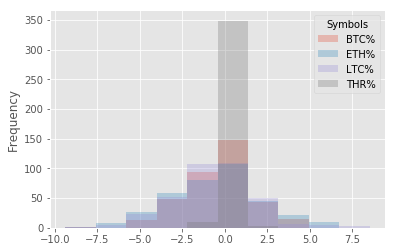

In [66]:
newdf.plot(kind='hist', alpha= 0.3 )

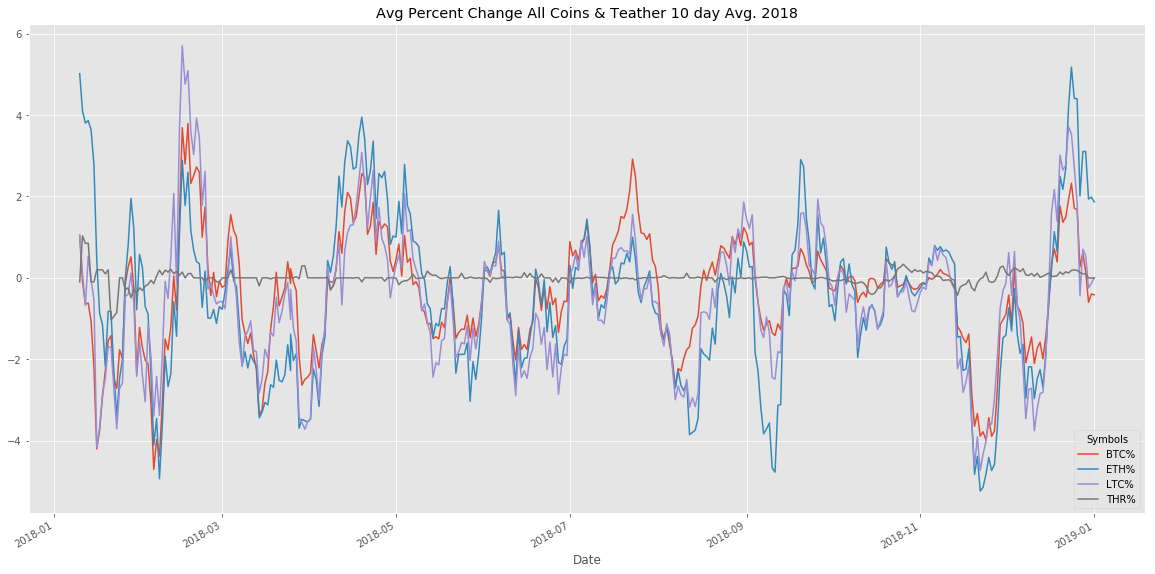

In [71]:
#Update alphas

newdf.plot(kind='line', y=['BTC%','ETH%', 'LTC%','THR%'],legend=True, figsize=(20,10), title='Avg Percent Change All Coins & Teather 10 day Avg. 2018')



In [37]:
#thoughts about pvalues for each of the categories
#chi values


In [38]:
final.mean()

Symbols
BTC%   -0.339542
ETH%   -0.455694
LTC%   -0.531061
dtype: float64

In [39]:
#create mean in dataframe
#change df to show whole numbers
mean = final.mean(axis=1)

final['Mean'] = mean
final.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Symbols,Date,BTC%,ETH%,LTC%,Mean
0,2018-01-01,0.000000,0.000000,0.000000,0.000000
1,2018-01-02,9.292468,13.091453,11.551208,11.311710
2,2018-01-03,2.691437,8.782894,-2.892794,2.860513
3,2018-01-04,0.154664,0.395566,-2.621649,-0.690473
4,2018-01-05,11.056571,2.332789,2.572579,5.320646


In [40]:
#copydf


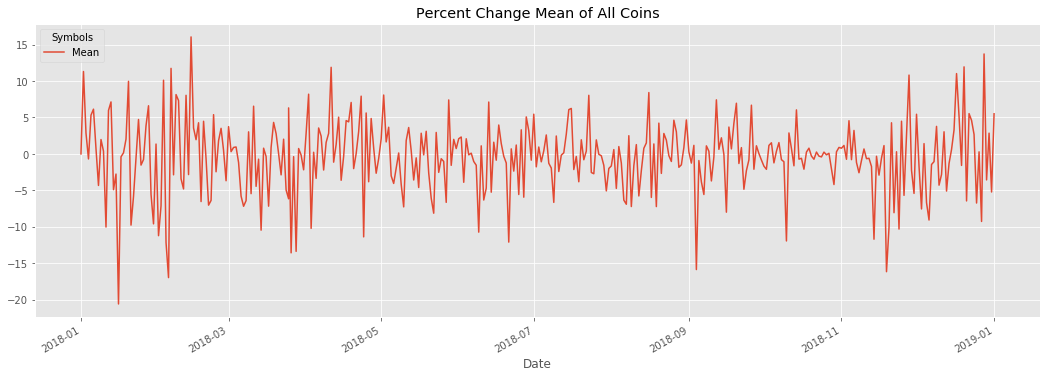

In [41]:
final.plot(kind='line', x='Date', y=['Mean'],legend=True, figsize=(18,6), title='Percent Change Mean of All Coins')

In [42]:
#new DF
multiplot = final

multiplot['Date'] = pd.to_numeric(multiplot['Date'])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


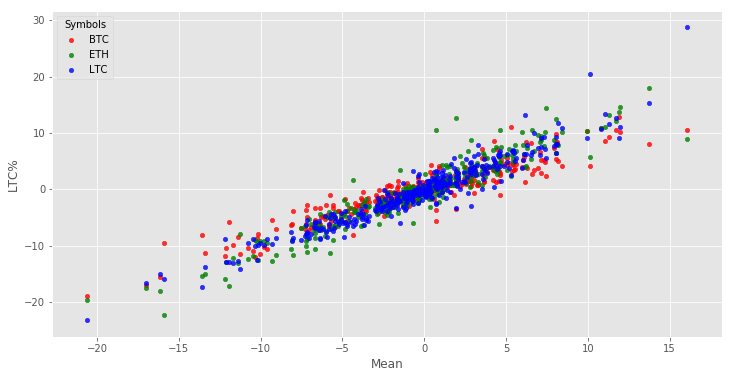

In [43]:
ax1 = multiplot.plot(kind='scatter', x='Mean', y='BTC%', color='r', label="BTC", alpha=.8)    
ax2 = multiplot.plot(kind='scatter', x='Mean', y='ETH%', color='g', label="ETH",alpha=.8, ax=ax1)    
ax3 = multiplot.plot(kind='scatter', x='Mean', y='LTC%', color='b', label="LTC", alpha=.8,ax=ax1, figsize=(12,6))

#print(ax1 == ax2 == ax3)  # True
#plt.print

In [43]:
sub = final[['BTC%','ETH%','LTC%','THR%']]

In [44]:
final.head()

Symbols,Date,BTC%,ETH%,LTC%,THR%
0,2018-01-01,0.000000,0.000000,0.000000,0.000000
1,2018-01-02,9.292468,13.091453,11.551208,0.985229
2,2018-01-03,2.691437,8.782894,-2.892794,-0.985229
3,2018-01-04,0.154664,0.395566,-2.621649,0.985229
4,2018-01-05,11.056571,2.332789,2.572579,-0.985229


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24cfc1d0>,
      dtype=object)

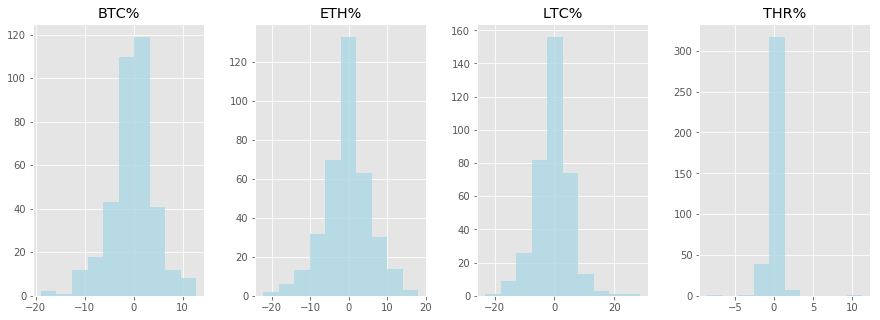

In [46]:

final.hist(column=['BTC%', 'ETH%','LTC%','THR%'], figsize=(15,5), alpha=.8, color='lightblue', layout=(1,4))

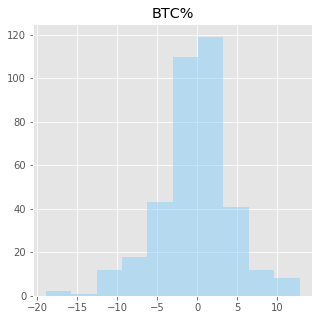

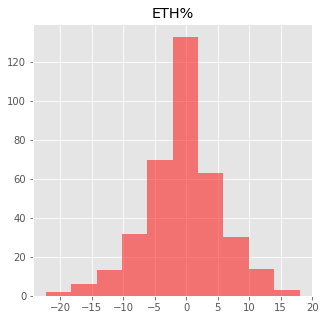

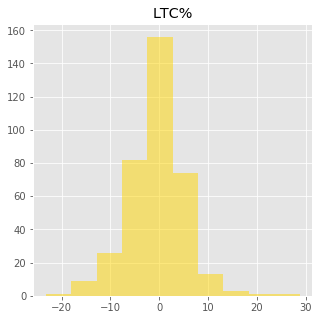

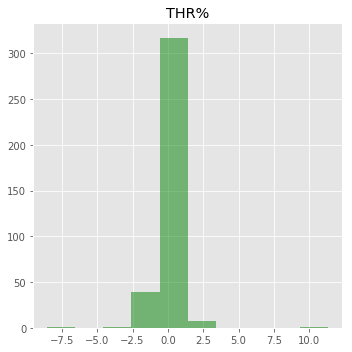

In [73]:
final.hist(column=['BTC%'], figsize=(5,5), alpha=.5, color='lightskyblue')
final.hist(column=['ETH%'], figsize=(5,5), alpha=.5, color='red')
final.hist(column=['LTC%'], figsize=(5,5), alpha=.5, color='gold')
final.hist(column=['THR%'], figsize=(5,5), alpha=.5, color='green')
plt.tight_layout()

In [48]:
# Calculating the p value for BTC vs. ETH
BTC_P = final["BTC%"]
ETH_P = final["ETH%"]

stats.ttest_ind(BTC_P, ETH_P, equal_var=False)

Ttest_indResult(statistic=0.3036003765621456, pvalue=0.7615254554418593)

In [49]:
# Calculating the p value of BTC Vs. LTC
LTC_P = final["LTC%"]

stats.ttest_ind(BTC_P, LTC_P, equal_var=False)

Ttest_indResult(statistic=0.5071138336062061, pvalue=0.6122382052553075)

In [95]:
#dropping NA rows
dropped_df = newdf.dropna(how='all')
dropped_df.head()

Symbols,BTC%,ETH%,LTC%,THR%
Date,,,,
2018-01-10,1.040701,5.017846,1.046917,-0.099503
2018-01-11,-0.102285,4.098809,0.097146,1.033784
2018-01-12,-0.638741,3.804637,-0.676010,0.845574
2018-01-13,-0.621634,3.864205,0.529801,0.853599
2018-01-14,-1.070778,3.638525,-0.060611,-0.098523


In [96]:
#ANOVA for the three currency percent change-- are they related?
newdf.dropna(axis='columns')

group1 = dropped_df["BTC%"]
group2 = dropped_df["ETH%"] 
group3 = dropped_df["LTC%"]
group4 = dropped_df["THR%"]


stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=11.56661883406876, pvalue=1.7157990391769624e-07)

In [97]:
#ANOVA for the three currency percent change-- are they related?
group1 = dropped_df["BTC%"]
group2 = dropped_df["ETH%"] 
group3 = dropped_df["LTC%"]

stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=1.3878694751028915, pvalue=0.25005633335875627)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27da8710>,
      dtype=object)

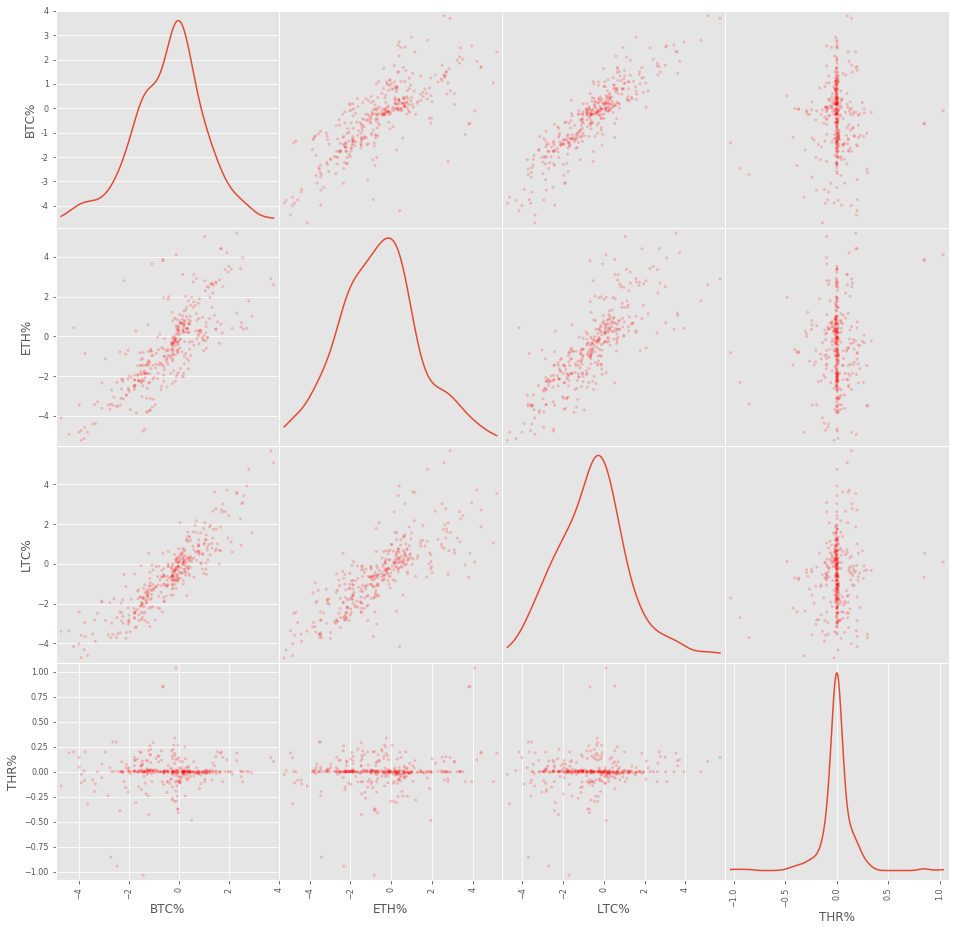

In [98]:
from pandas.plotting import scatter_matrix
scatter_matrix(newdf, alpha=0.2, figsize=(16, 16), diagonal='kde', color='r')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27c3b320>,
      dtype=object)

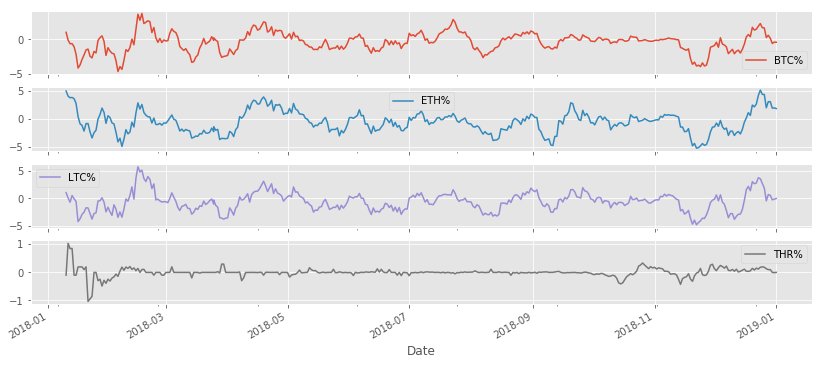

In [99]:
#sub = final[['BTC%','ETH%','LTC%']]

newdf.plot(subplots=True, figsize=(14, 6))